STEPS FOR THE SPAM DETECTION.
1. Read dataset and make it in proper format.
2. Encode labels
3. Convert all cases to lower
4. Remove punctuations
5. Remove Stopwords
6. Check stats of messages
7. Convert all texts into vectors
8. Import classifier
9. Train and test
10. Check the accuracy/confusion matrix.

In [75]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [76]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore")
import re

In [77]:
# Importing the dataset
df = pd.read_csv("/content/gdrive/My Drive/Dataset/messages.csv")
df.head()

,subject,message,label
0,job posting - apple-iss research center,"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and normalization ; prosodic analysis . substantial knowledge of the phonology , syntax , and semantics of chinese is required . knowledge of acoustic phonetics and / or speech signal processing is desirable . both candidates will have a phd with at least 2 to 4 years of relevant work experience , or a technical msc degree with at least 5 to 7 years of experienc e . very strong software engineering skills , including design and implementation , and productization are required in these positions . knowledge of c , c + + and unix are preferred . a unix & c programmer - - - - - - - - - - - - - - - - - - - - we are looking for an experienced unix & c programmer , preferably with good industry experience , to join us in breaking new frontiers . strong knowledge of unix tools ( compilers , linkers , make , x - windows , e - mac , . . . ) and experience in matlab required . sun and silicon graphic experience is an advantage . programmers with less than two years industry experience need not apply . these positions include interaction with scientists in the national university of singapore , and with apple 's speech research and productization efforts located in cupertino , california . attendance and publication in international scientific / engineering conferences is encouraged . benefits include an internationally competitive salary , housing subsidy , and relocation expenses . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ send a complete resume , enclosing personal particulars , qualifications , experience and contact telephone number to : mr jean - luc lebrun center manager apple - iss research center , institute of systems science heng mui keng terrace , singapore 0511 tel : ( 65 ) 772-6571 fax : ( 65 ) 776-4005 email : jllebrun @ iss . nus . sg\n",0
1,NaN,"lang classification grimes , joseph e . and barbara f . grimes ; ethnologue language family index ; pb . isbn : 0-88312 - 708 - 3 ; vi , 116 pp . ; $ 14 . 00 . summer institute of linguistics . this companion volume to ethnologue : languages of the world , twelfth edition lists language families of the world with sub-groups shown in a tree arrangement under the broadest classification of language family . the language family index facilitates locating language names in the ethnologue , making the data there more accessible . internet : academic . books @ sil . org languages , reference lang & culture gregerson , marilyn ; ritual , belief , and kinship in sulawesi ; pb . : isbn : 0-88312 - 621 - 4 ; ix , 194 pp . ; $ 25 . 00 . summer institute of linguistics . seven articles discuss five language groups in sulawesi , indonesia ; the primary focus is on cultural matters , with some linguistic content . topics include traditional religion and beliefs , certain ceremonies , and kinship . internet : academic . books @ sil . org language and society , indo

In [78]:
# Number of observations in the data
df.shape

(2893, 3)

In [79]:
# labels of the dataset contains (1- Spam message ) and (0 - Ham)
# Counts of the labels
df['label'].value_counts()

0    2412
1    481 
Name: label, dtype: int64

In [80]:
# Checking the message types of the Spam
pd.set_option('display.max_colwidth', -1)
df[df['label']== 1]['message']

21      this is a multi-part message in mime format . - - - - - - = _ nextpart _ 000 _ 0139 _ 01bd8356 . 354ff2e0 content - type : multipart / alternative ; boundary = " - - - - = _ nextpart _ 001 _ 013a _ 01bd8356 . 354ff2e0 " - - - - - - = _ nextpart _ 001 _ 013a _ 01bd8356 . 354ff2e0 content - type : text / plain ; charset = " iso - 8859 - 1 " content - transfer - encoding : 7bit * * * scotland-net ~ make and save $ $ $ $ $ on the world wide web now ! * free web access ! ! ! free web access ! ! ! free web access ! ! ! note - though this isp 's service is initially only available from the uk , the referral agent opportunity is available worldwide , and overseas agents do n't need to take the service themselves . uk internet provider who will give any customer permanent free access - for introducing new users . they also offer monthly residual income for introducing more users down to 7 levels . the company is an existing provider and not new but is obviously progressive ! pre - apply

In [81]:
# Checking for the duplicates in the dataset
df.duplicated(['subject','message'],keep = False)

0       False
1       False
2       False
3       False
4       False
        ...  
2888    False
2889    False
2890    False
2891    False
2892    False
Length: 2893, dtype: bool

In [82]:
# Checking for the null values in the df
df.isnull().sum()

subject    62
message    0 
label      0 
dtype: int64

In [83]:
nan_rows = df[df.isnull().any(1)]['label'].value_counts()
print (nan_rows)

0    49
1    13
Name: label, dtype: int64


13 null values are from the HAM messages.

In [84]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [subject, message, label]
Index: []


In [85]:
#New column for Length of message
df['length'] = df.message.str.len()
df.head(2)

,subject,message,label,length
0,job posting - apple-iss research center,"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and normalization ; prosodic analysis . substantial knowledge of the phonology , syntax , and semantics of chinese is required . knowledge of acoustic phonetics and / or speech signal processing is desirable . both candidates will have a phd with at least 2 to 4 years of relevant work experience , or a technical msc degree with at least 5 to 7 years of experienc e . very strong software engineering skills , including design and implementation , and productization are required in these positions . knowledge of c , c + + and unix are preferred . a unix & c programmer - - - - - - - - - - - - - - - - - - - - we are looking for an experienced unix & c programmer , preferably with good industry experience , to join us in breaking new frontiers . strong knowledge of unix tools ( compilers , linkers , make , x - windows , e - mac , . . . ) and experience in matlab required . sun and silicon graphic experience is an advantage . programmers with less than two years industry experience need not apply . these positions include interaction with scientists in the national university of singapore , and with apple 's speech research and productization efforts located in cupertino , california . attendance and publication in international scientific / engineering conferences is encouraged . benefits include an internationally competitive salary , housing subsidy , and relocation expenses . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ send a complete resume , enclosing personal particulars , qualifications , experience and contact telephone number to : mr jean - luc lebrun center manager apple - iss research center , institute of systems science heng mui keng terrace , singapore 0511 tel : ( 65 ) 772-6571 fax : ( 65 ) 776-4005 email : jllebrun @ iss . nus . sg\n",0,2856
1,,"lang classification grimes , joseph e . and barbara f . grimes ; ethnologue language family index ; pb . isbn : 0-88312 - 708 - 3 ; vi , 116 pp . ; $ 14 . 00 . summer institute of linguistics . this companion volume to ethnologue : languages of the world , twelfth edition lists language families of the world with sub-groups shown in a tree arrangement under the broadest classification of language family . the language family index facilitates locating language names in the ethnologue , making the data there more accessible . internet : academic . books @ sil . org languages , reference lang & culture gregerson , marilyn ; ritual , belief , and kinship in sulawesi ; pb . : isbn : 0-88312 - 621 - 4 ; ix , 194 pp . ; $ 25 . 00 . summer institute of linguistics . seven articles discuss five language groups in sulawesi , indonesia ; the primary focus is on cultural matters , with some linguistic content . topics include traditional religion and beliefs , certain ceremonies , and kinship . internet : academic . books @ sil . org language and socie

In [86]:
df[df['label']==1]['length']

21      18437
38      7387 
84      8172 
85      11808
86      2161 
        ...  
2884    262  
2886    3019 
2887    795  
2888    262  
2889    2163 
Name: length, Length: 481, dtype: int64

In [87]:
df[df['label']==0]['length']

0       2856 
1       1800 
2       1435 
3       324  
4       1046 
        ...  
2883    2132 
2885    14301
2890    1039 
2891    2949 
2892    700  
Name: length, Length: 2412, dtype: int64

We can see the length of Spam messages are bigger than the length of Ham messages

In [88]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
df['message'] = df['message'].str.strip()

In [90]:
def lower_str(series):
  return series.lower()

In [91]:
df['message'] = df['message'].apply(lower_str)
df['subject'] = df['subject'].apply(lower_str)

In [92]:
def pre_process(series):
  """ Removing all the html tags , urls , telephone digits """ 
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-_*0-9+]')
  BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
  series = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress',series)
  series = re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',"webaddress",series)
  series = re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','number',series)
  series = re.sub(r'\d+(\.\d+)?','number',series)
  series=re.sub(REPLACE_BY_SPACE_RE," ",series)
  series = re.sub(BAD_SYMBOLS_RE," ",series)
  series = re.sub(r'\s+'," ",series)
  return series

In [93]:
df['message'] = df['message'].map(pre_process)
df['message']

0       content length number apple iss research center a us number million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or spee

In [94]:
df['subject'] = df['subject'].map(pre_process)

In [95]:
# def token(series):
#   series = word_tokenize(series)
#   series = [word for word in series if word.isalpha()]
#   return series

In [96]:
# df['message'] = df['message'].map(token)

In [97]:
# df['subject'] = df['subject'].map(token)

In [98]:
df['message']

0       content length number apple iss research center a us number million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or spee

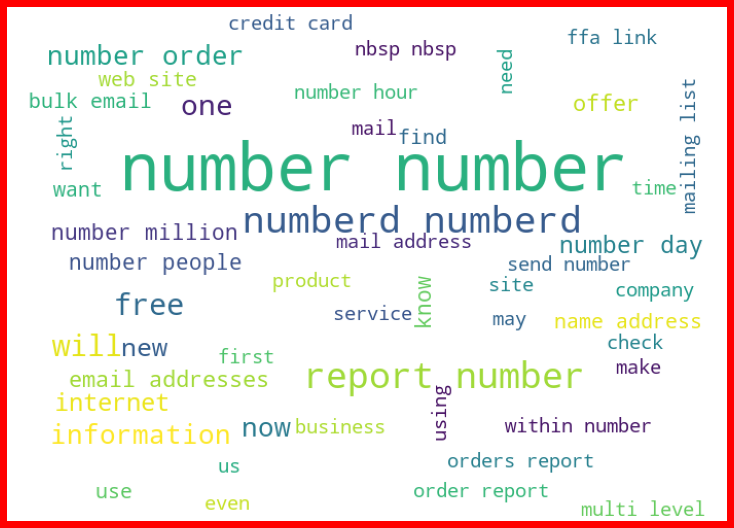

In [99]:
# Checking the Most frequent Words from the word-cloud
# Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df[df['label']==1]['message']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(str(v) for v in spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

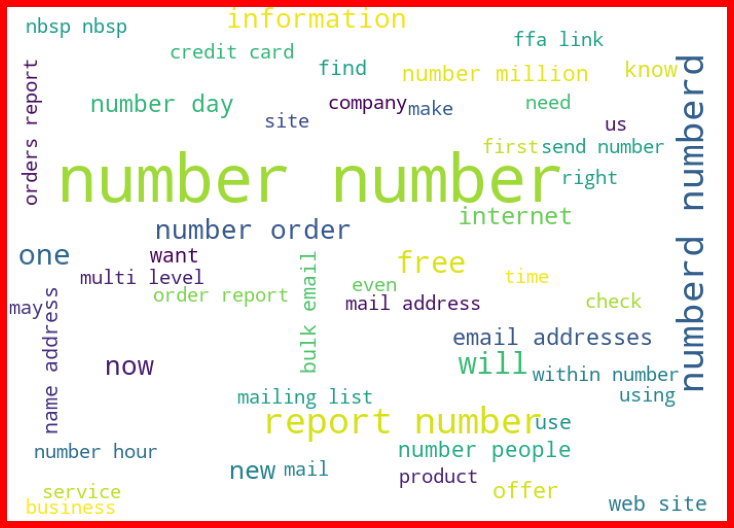

In [100]:
# Checking the most frequent words in the HAM messages
ham = df[df['label']==1]['message']
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(str(v) for v in ham))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see 'number' and 'number id' is highly used in both the cases . 

In [101]:
# Removing the stop words from the feature messages
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [102]:
# df['message'] = df['message'].map(stop_rem)

In [103]:
# New_feature after clearning the stop_words
df['clear_length'] = df.message.str.len()
df.head(2)

,subject,message,label,length,clear_length
0,job posting apple iss research center,content length number apple iss research center us number million joint venture apple computer inc institute systems science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge state art corpus based n gram language models cache language models part speech language models required text speech project leader successful candidate research expertise expertise two following areas computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidates phd least number number years relevant work experience technical msc degree least number number years experienc e strong software engineering skills including design implementation productization required positions knowledge c c unix preferred unix c programmer looking experienced unix c programmer preferably good industry experience join us breaking new frontiers strong knowledge unix tools compilers linkers make x windows e mac experience matlab required sun silicon graphic experience advantage programmers less two years industry experience need apply positions include interaction scientists national university singapore apple speech research productization efforts located cupertino california attendance publication international scientific engineering conferences encouraged benefits include internationally competitive salary housing subsidy relocation expenses send complete resume enclosing personal particulars qualifications experience contact telephone number mr jean luc lebrun center manager apple iss research center institute systems science heng mui keng terrace singapore number tel number number number fax number number number email jllebrun iss nus sg,0,2856,2052
1,,lang classification grimes joseph e barbara f grimes ethnologue language family index pb isbn number number number number vi number pp number number summer institute linguistics companion volume ethnologue languages world twelfth edition lists language families world sub groups shown tree arrangement broadest classification language family language family index facilitates locating language names ethnologue making data accessible internet academic books sil org languages reference lang culture gregerson marilyn ritual belief kinship sulawesi pb isbn number number number number ix number pp number number summer institute linguistics seven articles discuss five language groups sulawesi indonesia primary focus cultural matters linguistic content topics include traditional religion beliefs certain ceremonies kinship internet academic books sil org language society indonesia computers ling weber david j stephen r mcconnel diana weber beth j bryson primer tool developing early reading materials pb isbn number number number number xvi number pp ms dos software number number summer institute linguistics authors present computer program instructions developing reading materials languages little background literacy book structured manual step step procedures establish appropriate primer sequence organize words phrases sentences correlate sequence presupposes thorough knowledge linguistics internet academic books sil org literacy computer,0,1800,1451


In [104]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [105]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8328729281767956


In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.13      0.23       139

    accuracy                           0.83       724
   macro avg       0.91      0.56      0.57       724
weighted avg       0.86      0.83      0.78       724



In [107]:
 log_loss=log_loss(y_test,y_pred)
 print(log_loss)

5.772364563237836


We can see the Log-loss of the model is high as the log loss considers the actucal probability of the model

In [108]:
# Applying the Naive Bayes for the classification after the resampling of the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.70)
X_train_ns , Y_train_ns = os.fit_sample(X_train , Y_train)
print("Number of classes before fit {}".format(Counter(Y_train)))
print("Number of classes after fit {}".format(Counter(Y_train_ns)))

Number of classes before fit Counter({0: 1827, 1: 342})
Number of classes after fit Counter({0: 1827, 1: 1278})


Balanced the data , so that model could predict accurately.

In [109]:
naive.fit(X_train_ns,Y_train_ns)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.994475138121547


Model accurcay increased efficiently due to the oversampling.

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       585
           1       0.99      0.98      0.99       139

    accuracy                           0.99       724
   macro avg       0.99      0.99      0.99       724
weighted avg       0.99      0.99      0.99       724

